In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DATASET\\uk_road_accident.csv')

In [3]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
df['Accident Date'] = df['Accident Date'].str.strip()
df['Accident Date'] = df['Accident Date'].astype('str')
df['Accident Date'] = df['Accident Date'].str.replace('/', '-')

In [5]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst = True, errors = 'coerce')

In [6]:
df.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [7]:
df['Year'] = df['Accident Date'].dt.year
df['Month'] = df['Accident Date'].dt.month
df['Day'] = df['Accident Date'].dt.day
df['DayOfWeek'] = df['Accident Date'].dt.dayofweek

<h1>1. How many total accidents are in the data?</h1>

In [8]:
df.shape[0]

660679

<h3>Insight : The total number of accidents in the data is 660,679</h3>

<h1>2. How many accidents happened by severity (Slight, Serious, Fatal)?</h1>

In [9]:
df["Accident_Severity"].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h3>Insight : Here are the total numbers of accidents by severity: Slight - 563,801, Serious - 88,217, and Fatal - 8,661</h3>

<h1>3. What is the most common accident severity?</h1>

In [10]:
df["Accident_Severity"].mode()[0]

'Slight'

<h3>Insight : The most common accident severity is "Slight"</h3>

<h1>4. On average, how many people are hurt in each accident?</h1>

In [11]:
df["Number_of_Casualties"].mean()

np.float64(1.357040257068864)

<h3>Insight : The average number of casualties per accident is 1.35</h3>

<h1>5. What is the highest number of people hurt in a single accident?</h1>

In [12]:
df["Number_of_Casualties"].max()

np.int64(68)

<h3>Insight : The highest number of people hurt in a single accident is 68</h3>

<h1>6. What is the lowest number of people hurt in a single accident?</h1>

In [13]:
df["Number_of_Casualties"].min()

np.int64(1)

<h3>Insight : The lowest number of people hurt in a single accident is 1</h3>

<h1>7. How many total people were hurt in all accidents?</h1>

In [14]:
df["Number_of_Casualties"].sum()

np.int64(896568)

<h3>Insight : The total people were hurt in all accidents is 896,568</h3>

<h1>8. On average, how many vehicles are involved in one accident?</h1>

In [15]:
df["Number_of_Vehicles"].mean()

np.float64(1.8312554205597575)

<h3>Insight : The average vehicles per accident is 1.83</h3>

<h1>9. What is the highest number of vehicles in one accident?</h1>

In [16]:
df["Number_of_Vehicles"].max()

np.int64(32)

<h3>Insight : The highest number of vehicles in one accident is 32</h3>

<h1>10. What is the most common number of vehicles in an accident?</h1>

In [17]:
df["Number_of_Vehicles"].mode()[0]

np.int64(2)

<h3>Insight : The most common number of vehicles in an accident is 2</h3>

<h1>11. How many accidents happened under each light condition?</h1>

In [18]:
df["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insight : Here are the accidents happened under each light condition:<br>Daylight - 484,880<br>Darkness(lights lit) - 129,335<br>Darkness(no lighting) - 37,437<br>Darkness(lighting unknown) - 6,484<br>Darkness(lights unlit) - 2,543
</h3>

<h1>12. What is the most common light condition during accidents?</h1>

In [19]:
df["Light_Conditions"].mode()[0]

'Daylight'

<h3>Insight : The most common light condition during accidents is Daylight</h3>

<h1>13. How many accidents happened under each weather condition?</h1>

In [20]:
df["Weather_Conditions"].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3>Insight : Here are the accidents happened under each weather condition:<br>Fine no high winds - 520,885<br>Raining no high winds - 79,696<br>Other - 17,150<br>Raining + high winds - 9,615<br>Fine + high winds) - 8,554<br>Snowing no high winds - 6,238<br>Fog or mist - 3,528<br>Snowing + high winds - 8,85
</h3>

<h1>14. What is the most common weather condition during accidents?</h1>

In [21]:
df["Weather_Conditions"].mode()[0]

'Fine no high winds'

<h3>Insight : The most common weather condition during accidents is 'Fine no high winds'
</h3>

<h1>15. Which 5 districts have the most accidents?</h1>

In [22]:
df["District Area"].value_counts().head(5)

District Area
Birmingham    13491
Leeds          8898
Manchester     6720
Bradford       6212
Sheffield      5710
Name: count, dtype: int64

<h3>Insight : The 5 districts that have the most accidents are:<br>Birmingham - 13,491<br>Leeds - 8,898<br>Manchester - 6,720<br>Bradford - 6,212<br>Sheffield - 5,710</h3>

<h1>16. How many accidents happened on each road surface condition?</h1>

In [23]:
df["Road_Surface_Conditions"].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

<h3>Insight : Here are the accidents that happened on each road surface condition:<br>Dry - 447,821<br>Wet or damp - 186,708<br>Frost or ice - 18,517<br>Snow - 5,890<br>Flood over 3cm. deep - 1,017</h3>

<h1>17. What is the most common road surface condition in accidents?</h1>

In [24]:
df["Road_Surface_Conditions"].mode()[0]

'Dry'

<h3>Insight : The most common road surface condition in accidents is 'Dry'
</h3>

<h1>18. How many accidents happened in urban vs rural areas?</h1>

In [25]:
df["Urban_or_Rural_Area"].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h3>Insight : The number of accidents happened in urban vs rural areas are<br>Urban - 421,663<br>Rural - 238,990<br>Unallocated - 11</h3>

<h1>19. Which 5 vehicle types are most often in accidents?</h1>

In [26]:
df["Vehicle_Type"].value_counts().head(5)

Vehicle_Type
Car                                     497992
Van / Goods 3.5 tonnes mgw or under      34160
Bus or coach (17 or more pass seats)     25878
Motorcycle over 500cc                    25657
Goods 7.5 tonnes mgw and over            17307
Name: count, dtype: int64

<h3>Insight : Here are the 5 vehicle types that are most often in accidents:<br>Car - 497,992<br>Van / Goods 3.5 tonnes mgw or under - 34,160<br>Bus or coach (17 or more pass seats) - 25,878<br>Motorcycle over 500cc - 25,657<br>Goods 7.5 tonnes mgw and over - 17,307</h3>

<h1>20. What are the summary stats for casualties and vehicles?</h1>

In [27]:
df[["Number_of_Casualties", "Number_of_Vehicles"]].describe()

,Number_of_Casualties,Number_of_Vehicles
count,660679.000000,660679.000000
mean,1.357040,1.831255
std,0.824847,0.715269
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,68.000000,32.000000


<h3>Insight : This shows the smallest, biggest, and average numbers for both casualties and vehicles in the accidents.</h3>

<h1>21. How many accidents happened each year?</h1>

In [28]:
df["Year"].value_counts().head(5)

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

<h3>Insight : Every year have many accidents, and the year 2019 has the highest counts.</h3>

<h1>22. Which month has the most accidents?</h1>

In [29]:
df["Month"].mode()[0]

np.int32(11)

<h3>Insight : The most common month for accidents is November (month 11).</h3>

<h1>23. Which day of the week has the most accidents?</h1>

In [30]:
df["DayOfWeek"].mode()[0]

np.int32(5)

<h3>Insight : The most common accident day is Friday (Day 5).</h3>

<h1>24. On average, how many accidents happen in a month?</h1>

In [31]:
df.groupby("Month")["Index"].count().mean()

np.float64(55056.583333333336)

<h3>Insight : On average, about 55,057 accidents happen in a month.</h3>

<h1>25. Which 3 days of the month have the most accidents?</h1>

In [32]:
df["Day"].value_counts().head(3)

Day
1     22606
12    22536
11    22503
Name: count, dtype: int64

<h3>Insight : Accidents happen a lot on the 1st, 11th, and 12th day of each month.<br>Day 1 of the month had 22,606 accidents (most).
<br>Day 12 had 22,536 accidents.<br>Day 11 had 22,503 accidents.</h3>

In [33]:
df['District Area'].unique()

array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

<hr>
<h1>Northumberland Insights</h1>

In [34]:
northumberland_df = df[df['District Area'] == 'Northumberland']

In [35]:
northumberland_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
396006,2.01E+12,Slight,2021-04-02,55.183406,Daylight,Northumberland,-1.572808,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,4,2,4
396024,2.01E+12,Slight,2021-04-02,55.166868,Daylight,Northumberland,-1.690719,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over,2021,4,2,4
396030,2.01E+12,Slight,2021-04-03,54.961198,Daylight,Northumberland,-1.845977,1,4,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,4,3,5
396063,2.01E+12,Slight,2021-04-06,55.181057,Daylight,Northumberland,-1.653863,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,6,1
396064,2.01E+12,Slight,2021-04-07,55.283921,Daylight,Northumberland,-1.803953,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561333,2.01E+12,Slight,2022-12-28,55.422142,Daylight,Northumberland,-1.684303,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,12,28,2
561334,2.01E+12,Serious,2022-08-30,55.191058,Daylight,Northumberland,-1.697600,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,8,30,1
561341,2.01E+12,Slight,2022-12-17,55.182454,Darkness - lights lit,Northumberland,-1.610665,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,12,17,5
561342,2.01E+12,Slight,2022-12-31,55.127187,Daylight,Northumberland,-1.557569,2,2,Dry,Roundabout,Rural,Fine no high winds,Car,2022,12,31,5


In [36]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


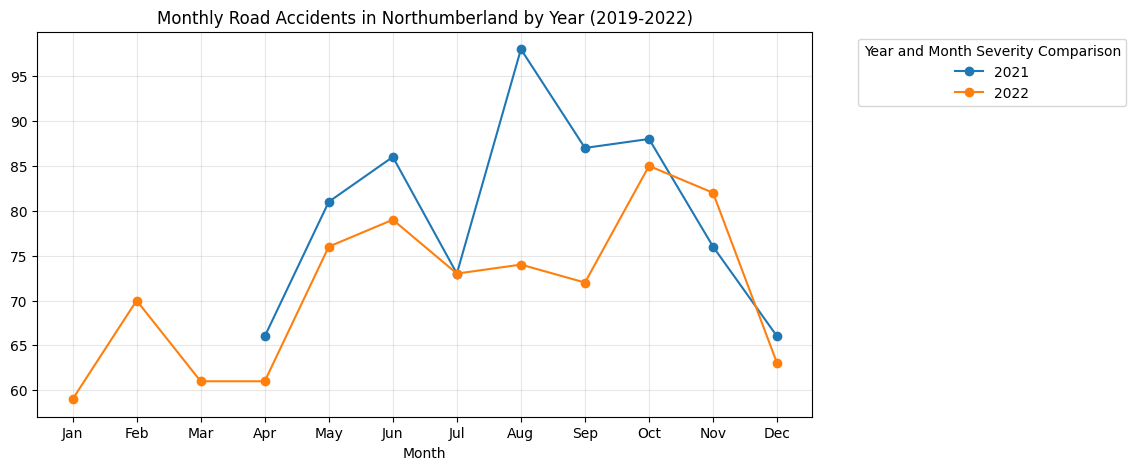

In [37]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = northumberland_df.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Northumberland by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3>26 & 27</h3>
<p>Insight : Consistently fewer accidents in 2022 than in 2021 (except for a few months like October and November).
<br>Insight : The biggest difference was in August, where 2021 spiked significantly, unlike 2022.</p>

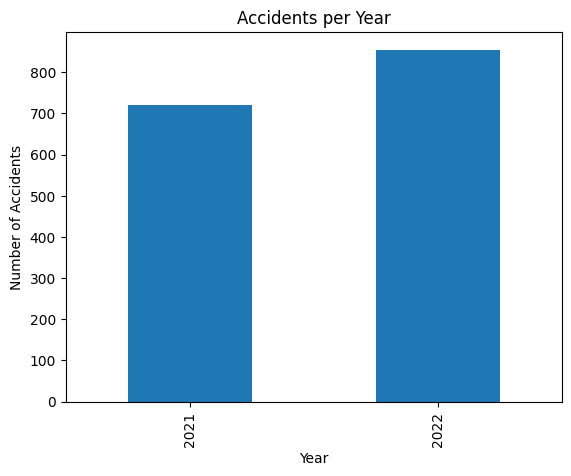

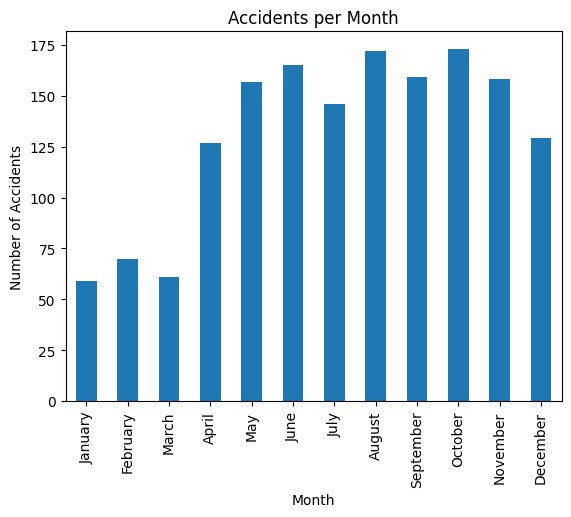

DayOfWeek
Monday       208
Tuesday      199
Wednesday    248
Thursday     190
Friday       234
Saturday     254
Sunday       243
Name: count, dtype: int64


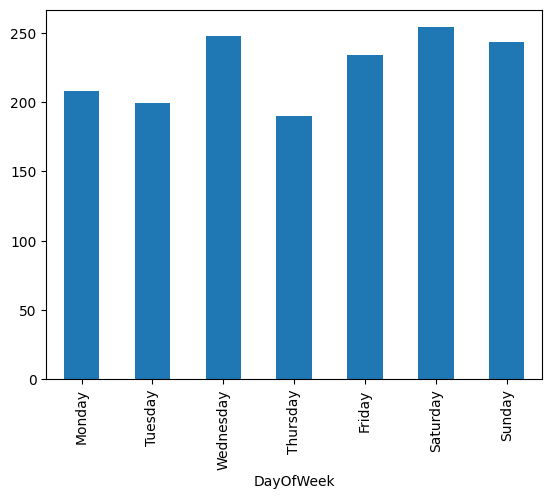

In [38]:
# Accidents per year at northumberland
accidents_per_year = northumberland_df['Year'].value_counts().sort_index()
accidents_per_month = northumberland_df['Month'].value_counts().sort_index()
accidents_per_day = northumberland_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h3> 28, 29, 30.</h3>
<p><strong>Insight</strong> for Accidents per year in northumberland : 2022 had more road accidents than 2021.
<br>Approximately 2021: 720 accidents and 2022: 850 accidents
    
<br><strong>Insight</strong> for Accidents per month in northumberland : Accidents tend to be higher from May to November, especially in the summer and early fall months.
<br>Winter months (January–March, December) consistently have fewer accidents.

<br><strong>Insight</strong> for Accidents per Day of Week in northumberland : Saturday and Sunday experience the highest number of accidents, both slightly over 250 incidents.
<br>Monday and Tuesday have the fewest accidents, but the count is still significant, around 200 or slightly less.</p>

In [39]:
accidents_per_month = northumberland_df['Month'].value_counts().sort_index()
accidents_per_month

Month
1      59
2      70
3      61
4     127
5     157
6     165
7     146
8     172
9     159
10    173
11    158
12    129
Name: count, dtype: int64

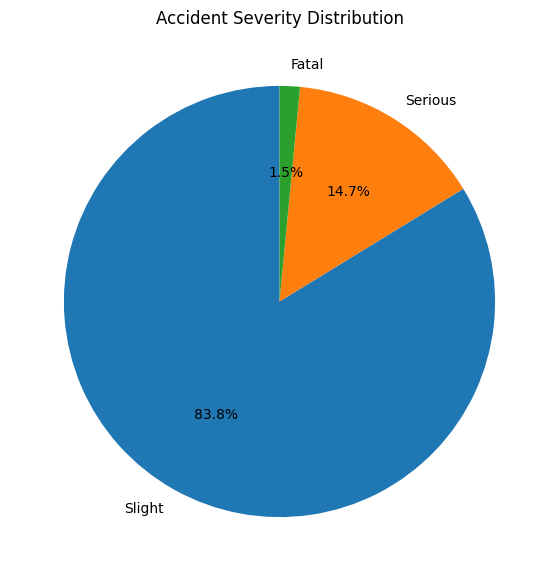

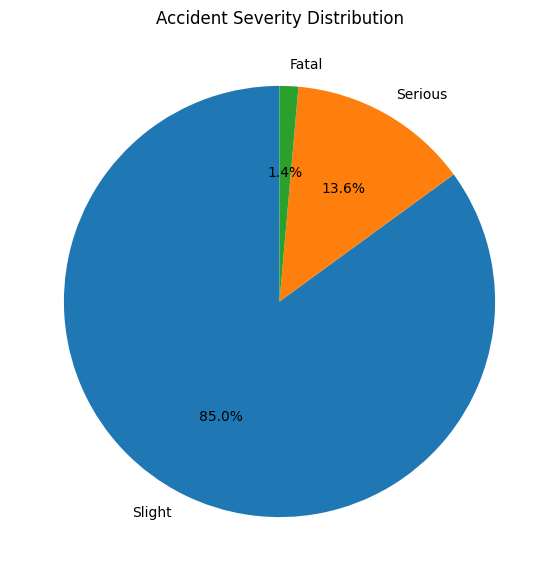

In [40]:
severity_counts = northumberland_df['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_northumberland = northumberland_df[northumberland_df['Year'] == 2022]
# severity_2022
nsc_2022 = severity_2022_northumberland['Accident_Severity'].value_counts()

plt.pie(nsc_2022,
        labels = nsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h3> 31.</h3>
<p><strong>Insight</strong> for Accidents Severity at Northumberland :
<br>Majority of Accidents are Slight: The vast majority (85%) of accidents were classified as slight, indicating minor injuries.
<br>Serious Accidents: 13.6% of the accidents were serious, which suggests moderate injuries or significant damage.
<br>Fatal Accidents: Only 1.4% of the accidents were fatal, indicating a very small proportion of the accidents were deadly.</p>

In [41]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
import folium
from folium.plugins import HeatMap

# Step 1: Extract latitude and longitude from the DataFrame
locations = list(zip(northumberland_df['Latitude'], northumberland_df['Longitude']))

# Step 2: Create a base map centered on a specific location
# You can adjust the center and zoom level based on your data
m = folium.Map(location=[northumberland_df['Latitude'].mean(), northumberland_df['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m.save('accident_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

<hr>
<h1>County Durham Insights</h1>

In [43]:
county_durham = df[df['District Area'] == 'County Durham']
county_durham

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
399187,200911ND07999,Slight,2021-04-02,54.752380,Daylight,County Durham,-1.472792,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,2,4
399188,200911ND08009,Slight,2021-04-03,54.765338,Daylight,County Durham,-1.520027,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,3,5
399189,200911ND08109,Slight,2021-04-05,54.762584,Daylight,County Durham,-1.463335,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,5,0
399190,200911ND08289,Slight,2021-04-12,54.729756,Daylight,County Durham,-1.521535,1,2,Dry,Slip road,Rural,Fine no high winds,Car,2021,4,12,0
399192,200911ND08599,Slight,2021-04-06,54.805789,Daylight,County Durham,-1.522815,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2021,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562762,201011SL28650,Slight,2022-11-29,54.704466,Darkness - lights lit,County Durham,-1.611687,2,2,Snow,Single carriageway,Urban,Snowing no high winds,Car,2022,11,29,1
562763,201011SL29160,Slight,2022-12-06,54.705043,Daylight,County Durham,-1.595852,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2022,12,6,1
562764,201011SL29590,Slight,2022-12-13,54.703521,Daylight,County Durham,-1.597729,1,1,Snow,Single carriageway,Urban,Fine no high winds,Car,2022,12,13,1
562765,201011SL30490,Slight,2022-12-23,54.681451,Darkness - lights lit,County Durham,-1.532960,1,2,Snow,Single carriageway,Urban,Snowing no high winds,Car,2022,12,23,4


<hr>
<h1>Shropshire Insights</h1>

In [44]:
shropshire = df[df['District Area'] == 'Shropshire']
shropshire

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
427614,200922C903610,Serious,2021-07-04,52.313976,Daylight,Shropshire,-2.594808,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,7,4,6
428500,200922D905319,Slight,2021-09-24,52.538912,Darkness - lights lit,Shropshire,-2.807656,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,9,24,4
429290,200922F000035,Slight,2021-12-26,52.378853,Darkness - lights unlit,Shropshire,-2.484029,1,1,Frost or ice,Single carriageway,Rural,Other,Car,2021,12,26,6
429291,200922F000061,Slight,2021-12-30,52.713960,Daylight,Shropshire,-2.819323,4,2,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car,2021,12,30,3
429292,200922F000077,Slight,2021-12-19,52.707812,Daylight,Shropshire,-2.757042,2,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,12,19,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589747,201022G005879,Slight,2022-11-26,52.537143,Daylight,Shropshire,-2.445665,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,11,26,5
589751,201022G005918,Slight,2022-11-25,52.418938,Darkness - no lighting,Shropshire,-2.416534,1,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,11,25,4
589763,201022G006041,Fatal,2022-12-04,52.551668,Daylight,Shropshire,-2.500381,3,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,12,4,6
589770,201022G006158,Slight,2022-12-06,52.545487,Darkness - no lighting,Shropshire,-2.399888,2,2,Frost or ice,Single carriageway,Rural,Fog or mist,Bus or coach (17 or more pass seats),2022,12,6,1


<hr>
<h1>Central Bedfordshire Insights</h1>

In [45]:
central_dedfordshire = df[df['District Area'] == 'Central Bedfordshire']
central_dedfordshire

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
451328,2009400B00105,Slight,2021-12-20,52.071772,Daylight,Central Bedfordshire,-0.243149,3,1,Frost or ice,Roundabout,Rural,Other,Car,2021,12,20,0
451370,2009400B00492,Slight,2021-12-17,52.071772,Darkness - lights lit,Central Bedfordshire,-0.243149,1,1,Wet or damp,Roundabout,Rural,Other,Car,2021,12,17,4
451434,2009400B00970,Slight,2021-04-04,52.085321,Daylight,Central Bedfordshire,-0.265533,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,4,4,6
451437,2009400B00992,Slight,2021-04-06,52.126788,Daylight,Central Bedfordshire,-0.303660,1,2,Dry,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2021,4,6,1
451438,2009400B01004,Serious,2021-04-13,52.139094,Darkness - no lighting,Central Bedfordshire,-0.321605,1,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611289,2010400D03772,Slight,2022-12-19,52.015115,Darkness - no lighting,Central Bedfordshire,-0.297687,1,1,Frost or ice,Single carriageway,Urban,Other,Car,2022,12,19,0
611290,2010400D03795,Slight,2022-12-29,51.984249,Darkness - no lighting,Central Bedfordshire,-0.634087,1,2,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,12,29,3
611291,2010400D03803,Slight,2022-12-22,51.931456,Darkness - lights lit,Central Bedfordshire,-0.587256,1,2,Frost or ice,Single carriageway,Rural,Snowing no high winds,Car,2022,12,22,3
611292,2010400D07161,Slight,2022-06-09,51.963476,Daylight,Central Bedfordshire,-0.522204,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Van / Goods 3.5 tonnes mgw or under,2022,6,9,3


<hr>
<h1>Cornwall Insights</h1>

In [46]:
cornwall = df[df['District Area'] == 'Cornwall']
cornwall

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
484274,200950AC2B004,Slight,2021-04-06,50.180885,Daylight,Cornwall,-5.281875,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2021,4,6,1
484275,200950AC2B005,Serious,2021-04-10,50.211390,Darkness - lights lit,Cornwall,-5.291119,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,4,10,5
484276,200950AC2B006,Serious,2021-04-30,50.208114,Daylight,Cornwall,-5.292436,1,1,Dry,One way street,Urban,Fine no high winds,Car,2021,4,30,4
484277,200950AC2B009,Slight,2021-06-05,50.212727,Daylight,Cornwall,-5.288407,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2021,6,5,5
484278,200950AC2B011,Slight,2021-07-02,50.194520,Darkness - no lighting,Cornwall,-5.308597,3,1,Wet or damp,Single carriageway,Rural,Raining no high winds,Van / Goods 3.5 tonnes mgw or under,2021,7,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644168,201050GW3R007,Slight,2022-08-07,50.334243,Daylight,Cornwall,-4.636660,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,8,7,6
644169,201050GW3R008,Serious,2022-09-07,50.343975,Daylight,Cornwall,-4.671356,1,2,Dry,Single carriageway,Rural,Fine no high winds,Other vehicle,2022,9,7,2
644171,201050GW3R010,Serious,2022-11-17,50.334272,Daylight,Cornwall,-4.639331,1,2,Wet or damp,One way street,Rural,Fine no high winds,Car,2022,11,17,3
644172,201050GW3R011,Slight,2022-12-08,50.343758,Daylight,Cornwall,-4.661223,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,12,8,3


<hr>
<h1>Wiltshire Insights</h1>

In [47]:
wiltshire = df[df['District Area'] == 'Wiltshire']
wiltshire

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
494440,200954DE44509,Slight,2021-12-10,51.630415,Daylight,Wiltshire,-1.825006,1,2,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car,2021,12,10,4
494600,200954EA14709,Slight,2021-04-22,51.346875,Daylight,Wiltshire,-2.243486,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,4,22,3
494601,200954EA17009,Slight,2021-05-16,51.358987,Daylight,Wiltshire,-2.256189,3,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,5,16,6
494602,200954EA20609,Slight,2021-06-15,51.360872,Daylight,Wiltshire,-2.257493,1,2,Dry,Single carriageway,Rural,Fine no high winds,Bus or coach (17 or more pass seats),2021,6,15,1
494603,200954EA20709,Slight,2021-06-14,51.343171,Daylight,Wiltshire,-2.251650,1,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2021,6,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651580,201054MB04410,Slight,2022-09-27,51.548912,Daylight,Wiltshire,-1.863104,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2022,9,27,1
651582,201054MB04610,Slight,2022-10-03,51.517428,Darkness - no lighting,Wiltshire,-2.253186,2,5,Dry,Dual carriageway,Rural,Fog or mist,Van / Goods 3.5 tonnes mgw or under,2022,10,3,0
651583,201054MB05410,Slight,2022-11-28,51.509992,Darkness - lighting unknown,Wiltshire,-2.191616,1,1,Frost or ice,Dual carriageway,Rural,Fine no high winds,Car,2022,11,28,0
651585,201054MB06010,Slight,2022-12-05,51.545756,Darkness - no lighting,Wiltshire,-1.855470,1,2,Frost or ice,Dual carriageway,Rural,Fine no high winds,Goods over 3.5t. and under 7.5t,2022,12,5,0
